# 2 Monte Carlo Integration

Integrals can be roughly estimated by randomly sampling. This is known as Monte Carlo integration.

## Hit-or-Miss Monte Carlo Integration

Suppose we want to compute $\displaystyle\int_a^b g(x)dx$ and $g(x)\in [0,h]$ when $x\in [a,b]$. We can sample $n$ points $(X_i,Y_i)$ where $X_i\sim U[a,b]$ and $Y_i\sim U[0,h]$.

Then,

$$\sum_{i=1}^n \mathbb I_{\{Y_i\leqslant g(X_i)\}}\sim B\left(n,\ \frac {1}{h(b-a)} \int_a^b g(t)dt\right).$$

Therefore,

$$\frac{h(b-a)}{n}\sum_{i=1}^n \mathbb I_{\{Y_i\leqslant g(X_i)\}}\xrightarrow{d}\int_a^b g(t)dt.$$

### Efficiency

The efficiency of such estimator is given by

$$\text{Var}\left[\frac{h(b-a)}{n}\sum_{i=1}^n \mathbb I_{\{Y_i\leqslant g(X_i)\}}\right]
=\frac{h(b-a)}{n}\left[1 -  \frac {1}{h(b-a)} \int_a^b g(t)dt\right] = \frac 1n \int_a^b (h-g(t))dt.$$

In [14]:
import numpy as np

def monte_carlo_simple(f, a, b, n = 10000, y_max = 10):
    """Approximate the definite integral of f from a to b by the
    Monte Carlo integration method using n samples. Require f >= 0."""
    x = np.random.uniform(a, b, n)
    y = np.random.uniform(0, y_max, n)
    return (y < f(x)).mean() * ((b - a) * y_max)

np.random.seed(0)

# compute \int_0^\pi sin^2(x) dx
n = 10000000
mc = monte_carlo_simple(lambda x: np.sin(x)**2, 0, np.pi, n = n, y_max = 1)
sigma = (np.pi/2/n) ** .5
print('Estimated =', mc)
print('95% CI    =', (mc - sigma * 1.96, mc + sigma * 1.96))
print('Exact     =', np.pi/2)

Estimated = 1.5706807161852445
95% CI    = (1.5699039040349136, 1.5714575283355754)
Exact     = 1.5707963267948966


Estimated = 1.7278759594743864 (n = 60)
Exact     = 1.5707963267948966


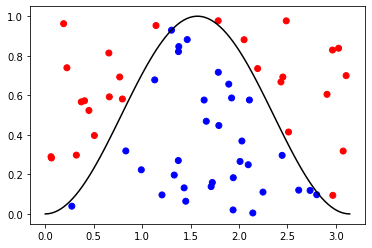

In [18]:
from matplotlib import pyplot as plt
import numpy as np

x = np.linspace(0, np.pi, 100)
f = lambda x: np.sin(x)**2
n = 60
np.random.seed(0)
sample_x, sample_y = np.random.uniform(0, np.pi, n), np.random.uniform(0, 1, n)
plt.plot(x, f(x), 'k')
plt.scatter(sample_x, sample_y, color = np.where(sample_y < f(sample_x), 'b', 'r'))
print('Estimated =', (sample_y < f(sample_x)).mean() * np.pi, '(n = %d)' % n)
print('Exact     =', np.pi/2)
plt.show()

## Simple Monte Carlo Integration

Suppose we want to compute $\displaystyle\int_a^b g(x)dx$ and $g(x)\in [0,h]$ when $x\in [a,b]$. We can sample $n$ points $X_i\sim U[a,b]$.

Then,

$$\frac{b-a}{n}\sum_{i=1}^n g(X_i)\xrightarrow{d}\int_a^b g(t)dt.$$

It has variance $\displaystyle\frac{(b-a)^2}{n}\text{Var}(g(x))$.


<!-- ### Hit-or-Miss Monte Carlo Integration

Apart from the simple Monte Carlo integration, there is also the hit-or-miss Monte Carlo integration. Assume $F$ is a cumulative distribution function with density $f$ and we want to compute $F(x)$.

Consider the following design: let $X_1, X_2, \ldots, X_n$ be independent random variables generated from such distribution. Then,

$$\sum_{i=1}^n \mathbb I_{\{X_i \leq x\}} \sim B(n, F(x)) $$

where $\mathbb I_{\{X_i \leq x\}}$ is the indicator function. Thus, $\frac1n\sum_{i=1}^n \mathbb I_{\{X_i \leq x\}}\xrightarrow{d} F(x)$. -->

### Expectance

The method can be seen as an expectance: $\int_a^b g(t)dt = \mathbb E(g(X))$ where $X\sim U[a,b]$. So we estimate the variance by sampling.

More generally, we can compute $\mathbb E_F(g(X))$ on other distributions $F$. Let $X_1, X_2, \ldots, X_n$ be independent random variables generated from $F$, then

$$\frac1n\sum_{i=1}^n g(X_i) \xrightarrow{d} \mathbb E_F(g(X)).$$

When $g(t)=g_x(t) = \mathbb I_{\{t\leq x\}}$ is the indicator, it degenerates to the cumulative distribution function of $F$:

$$\frac1n\sum_{i=1}^n \mathbb I_{\{X_i \leq x\}} \xrightarrow{d} F(x) = \int_{t\leqslant x}f(t)dt.$$

### Efficiency

The variance of $\frac1n\sum_{i=1}^n g(X_i) \xrightarrow{d} \mathbb E_F(g(X))$ is given by $\displaystyle\frac{1}{n}\text{Var}_F(g(x))$.

Particularly, when $g(t)=g_x(t) = \mathbb I_{\{t\leq x\}}\sim B(F(x))$ is the indicator, it degenerates to the cumulative distribution function:

$$\text{Var}\left(\frac1n\sum_{i=1}^n \mathbb I_{\{X_i \leq x\}}\right) = \frac{F(x)(1-F(x))}{n}\leqslant \frac{1}{4n}.$$


## Antithetic Variables

We need to reduce the variance to improve the efficiency.

<br>

One way to reduce variance is to use antithetic variables (对偶变量). The idea is that: when two random variables $X$ and $Y$ are negatively correlated, $X+Y$ has a smaller variance than $\text{Var}(X)+\text{Var}(Y)$.

Therefore, in a simple Monte Carlo integration over $[0,1]$, rather than generate $X_1, X_2, \ldots, X_n\sim U(0,1)$ independently, we can generate $X_1, X_2, \ldots, X_{\frac n2}\sim U(0,1)$ independently, and obtain $X_{\frac n2+i} = 1-X_i$ for the rest.


### Efficiency

**Theorem** Consider a uniform distribution $X\sim U(0,1)$. We want to compute $\mathbb E(g(X)) = \displaystyle \int_0^1 g(x)dx$, let $n$ be an even number and $X_1, X_2, \ldots, X_{\frac n2}\sim U(0,1)$ be independent random variables. Denote $\rho = \text{Corr}(g(X),g(1-X))$ to be the correlation. Then, the estimator $Z=\frac1n\sum_{i=1}^{\frac n2} (g(X_i)+g(1-X_i))$ has variance

$$\text{Var}(Z) = \frac{1+\rho}{n}\cdot \text{Var}(g(X)).$$

Moreover, if $g(x)$ is monotonic, then $\rho\leqslant 0$.

<br>

**Proof** Let $W_i = {g(X_i)+g(1-X_i)}$, then all $W_i$ are independent and $\text{Var}(Z) = \frac{1}{2n}\text{Var}(W_i)$. For $\text{Var}(W_i)$, it is

$$\text{Var}(W_i) = \text{Var}(g(X_i)+g(1-X_i)) = 2\text{Var}(g(X))+2\text{Cov}(g(X),g(1-X)).$$

Here we have used the fact that $\text{Var}(g(1-X)) = \text{Var}(g(X))$ because $1-X\sim U(0,1)\sim X$. Finally, plugging in $\text{Cov}(g(X),g(1-X)) = \text{Corr}(g(X),g(1-X)) \cdot \sqrt{\text{Var}(g(X))\text{Var}(g(1-X))}$ yields the result.

To show $\rho\leqslant 0$, without loss of generality we may assume $g$ is non-decreasing and $\mathbb E(g(X)) = 0$. Then we propose the following lemma:

* Lemma: $\displaystyle\int_0^1 g(x)dx = 0$, $g(x)$ is non-decreasing, then $\displaystyle\int_0^1g(x)g(1-x)dx \leqslant 0$

* Proof to Lemma: There exists $g(x_0) = 0$ by the mean value theorem. By symmetricity we can assume $x_0\geqslant \frac 12$. Then,

$$-\int_0^1g(x)g(1-x)dx = \int_{\frac 12}^1 (g(1-x_0) - g(1-x))g(x)dx\ +\ g(1-x_0)\int_0^{\frac 12}g(x)dx\geqslant 0.$$ 


### Gaussian Example

To compute $\displaystyle\sqrt{\frac{\pi}{2}}\text{erf}\left(\frac{x}{\sqrt 2}\right) = \displaystyle \int_{0}^x e^{-\frac{t^2}{2}}dt = x \displaystyle \int_{0}^1 e^{-\frac{x^2t^2}{2}}dt$, take $g(t) = e^{-\frac{x^2t^2}{2}}$. Then, the exact integral result (expectance) is

$$\mu = \mathbb E(g(X)) = \int_0^1 g(t)dt = \frac1x\sqrt{\frac{\pi}{2}}\text{erf}\left(\frac{x}{\sqrt 2}\right).$$

Thus,

$$\rho = \text{Corr}(g(X),g(1-X)) = \frac{ \displaystyle\int_0^1g(t)g(1-t)dt-\mu^2}{ \displaystyle\int_0^1g^2(t)dt-\mu^2}
=\frac{\frac{\sqrt{\pi}}{x}e^{-\frac{x^2}{4}}\text{erf}\left(\frac x2\right)-\mu^2}{\frac{\sqrt{\pi}}{2x}\text{erf}(x)-\mu^2}$$

For instance, when $x\approx 1.98$, we compute that $1+\rho\approx 3.3\times 10^{-3}$, scaling the variance by around $10^{-5}$.

1 + rho(1.9801980198019802) = 0.003341804085288169


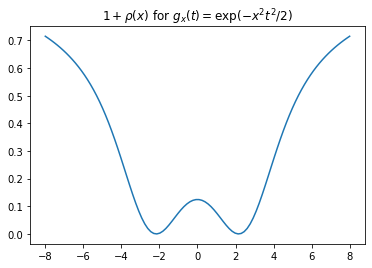

In [87]:
METHOD = 'numpy'
if METHOD == 'sympy':
    import sympy as sp
    x,z,t = sp.symbols('x z t', nonnegative = True)
    g = lambda t: sp.exp(-x**2*t**2/2)
    int1 = sp.Integral(g(t)*g(1-t), (t, 0, 1)) # == (sp.sqrt(sp.pi) / x * sp.exp(-x**2/4) * sp.erf(x/2))
    int2 = sp.Integral(g(t)**2, (t,0,1)).doit()
elif METHOD == 'numpy':
    import numpy as np
    from scipy.special import erf
    from matplotlib import pyplot as plt
    x = np.linspace(-8, 8, 102)
    mu_square = (np.pi/2) * (erf(x/2**.5) / x)**2
    rho_numerator = np.pi**.5 / x * np.exp(-x**2/4) * erf(x/2) - mu_square
    rho_denominator = np.pi**.5 / 2 / x * erf(x) - mu_square
    rho = rho_numerator / rho_denominator

    plt.plot(x, 1 + rho)
    plt.title('$1+\\rho(x)$ for $g_x(t) = \exp(-x^2 t^2 / 2)$')
    print('1 + rho({}) = {}'.format(x[63], 1 + rho[63]))
    plt.show()

## Control Variates

The method of control variates also helps reduce the variance. If we want to compute $\mathbb E(g(X))$, we can find a function $f(x)$ so that $\mu = \mathbb E(f(X))$ is easy to compute. Then, we can refine the estimator $g(X)$ with $\hat g(X)=g(X)-\alpha(f(X)-\mu)$ where $\alpha$ is a constant.

The variance of $\hat g(X)$ is

$$\text{Var}(\hat g(X)) = \text{Var}(g(X)) + \alpha^2\text{Var}(f(X)) - 2\alpha\text{Cov}(g(X),f(X)).$$

It reaches the infimum when $\alpha = \frac{\text{Cov}(g(X),f(X))}{\text{Var}(f(X))}$, and the minimum variance is 

$$\text{Var}(\hat g(X)) = \text{Var}(g(X)) - \frac{\text{Cov}^2(g(X),f(X))}{\text{Var}(f(X))}
= \text{Var}(g(X))\left(1-\rho^2\right).$$

Hence it is suggested to use $f(X)$ that is highly correlated (positively or negatively) with $g(X)$.

<br>

### Plug-in Estimator

Oftentimes it is difficult to compute the exact covariance $\text{Cov}(g(X),f(X))$. But we can use the sample covariance to replace it: $\hat\alpha = \frac{\widehat{\text{Cov}}(g(X),f(X))}{\text{Var}(f(X))}$. Then, we use the new estimator that

$$\hat Z = \frac 1n \sum_{i=1}^n \hat g(X_i) = \bar g - \hat\alpha\left(\bar f - \mu\right)\approx \int_0^1 g(x)dx$$

where $\bar g = \frac 1n \sum g(X_i)$ and $\bar f = \frac 1n \sum f(X_i)$ are the sample mean and

$$\hat\alpha = \frac{\sum_{i=1}^n (g(X_i)-\bar g)(f(X_i)-\bar f)}{\text{Var}(f(X))}.$$

### Linear Combination

We can see that the method is about the linear combination of two random variables: $g(X)$ and $(f(X) - \mu)$. Proper linear combination can reduce the variance while maintaining the expectation.

Also, the method of antithetic variables is about the linear combination of $g(X)$ and $g(1-X)$.

<br>

More generally, if we have $k$ random variables $f_1(X),\dotsc, f_k(X)$, denote $v = [f_k(X)]^T\in\mathbb R^k$. Then any coefficient $\alpha\in\mathbb R^k$ such that $\alpha^T\mathbb E(v) = \mathbb E(g(X))$ can be used to estimate $\alpha^Tv\approx \mathbb E(g(X))$.

The key is to find $\alpha$ that minimizes the variance while preserving the expectation. This is a least-squares problem and we can use the Lagrange multiplier method to solve it. If we write $\mu = \frac{1}{\mathbb E(g(X))}\mathbb E(v)$ to be the **standardized** mean and $\Sigma = \text{Var}(v)$ to be the covariance matrix of $v$, then


$$\alpha^* = \text{argmin}_{\{\alpha^T\mathbb E(v)=\mathbb E(g(X))\}} \text{Var}(\alpha^Tv) =\frac{1}{\mu^T\Sigma^{-1}\mu}\Sigma^{-1}\mu.$$


<br>



### Gaussian Example

To compute $\displaystyle \int_{0}^1 e^{-\frac{x^2t^2}{2}}dt$, take $g(t) = e^{-\frac{x^2t^2}{2}}$. We may use $f(t) = t$. Then, $\mathbb E(f) = \int_0^1 tdt =\frac12$,

$$\rho = \frac{\frac{1-e^{-\frac{x^2}{2}}}{x^2}-\frac12\mu_g}{\sqrt{\frac{1}{12}[\frac{\sqrt{\pi}}{2x}\text{erf}(x) - \mu_g^2]}}$$

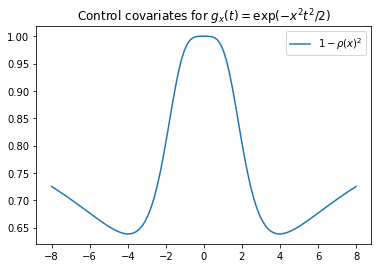

In [97]:
import numpy as np
from scipy.special import erf
from matplotlib import pyplot as plt
x = np.linspace(-8, 8, 102)
mu = (np.pi/2)**.5 * erf(x/2**.5) / x
rho_numerator = (1 - np.exp(-x**2/2)) / x**2 - mu / 2
rho_denominator =  ((np.pi/2/x * erf(x) - mu**2) / 12) ** .5
rho = rho_numerator / rho_denominator

plt.plot(x, 1 - rho**2, label = '$1 - \\rho(x)^2$')
plt.title('Control covariates for $g_x(t) = \exp(-x^2 t^2 / 2)$')
plt.legend()
plt.show()

## Importance Sampling

It is not a must to use the uniform distribution to estimate $\int g(x)dx$. We can use other distributions to sample. Suppose we want to compute $\mathbb E(g(X))$ where $X\sim F$. We can sample $X_1, X_2, \ldots, X_n$ from $F$ and use the estimator 

$$Z = \frac1n\sum_{i=1}^n \frac{g(X_i)}{f(X_i)}\xrightarrow{d} \mathbb E_F\left(\frac{g(X)}{f(X)}\right) = \int \frac{g(x)}{f(x)}f(x)dx = \int g(x)dx.$$


Here $f$ is the density of the sampling distribution, which we call the *importance function* or *envelope*. The method is called importance sampling (重要性采样).

The variance is $\frac 1n \text{Var}_F\left(\frac{g(X)}{f(X)}\right)$. To minimize the variance, we should select $f$ such that $\frac{g(x)}{f(x)}$ is close to a constant. Also be careful that $\int f(x)dx = 1$.

,mean,sd
$1$ ($0<x<1$),0.525310,0.245386
$3/2 - x$ ($0<x<1$),0.524019,0.095861
$\exp(-x)(1 - e^{-1})^{-1}$ ($0<x<1$),0.525466,0.096693
$4/\pi/(1 + x^2)$ ($0<x<1$),0.525500,0.141366


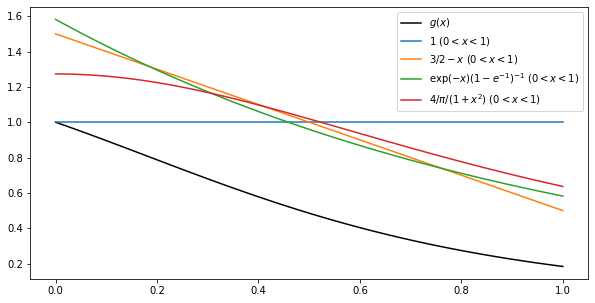

In [126]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import display

def inverse_transform(invF, u):
    return invF(u)

def importance_sampling(g, importance_funtion, inteval = (0,1), n = 100000):
    invF = importance_funtion['invF']
    f = importance_funtion['f']
    u = np.random.uniform(*inteval, n)
    x = inverse_transform(invF, u)
    v = g(x) / f(x)
    return v.mean(), v.var(ddof = 1) ** .5

# compute \int_0^1 exp(-x)/(1+x^2) dx
importance_functions = [
    {
        'name': '$1$ ($0<x<1$)',
        'f': lambda x: np.ones_like(x),
        'invF': lambda u: u,
    },
    {
        'name': '$3/2 - x$ ($0<x<1$)',
        'f': lambda x: 3/2 - x,
        'invF': lambda u: (3 - (9 - 8*u)**.5) / 2,
    },
    {
        'name': '$\\exp(-x)(1 - e^{-1})^{-1}$ ($0<x<1$)',
        'f': lambda x: np.exp(-x) / (1 - np.exp(-1)),
        'invF': lambda u: -np.log(1 - u * (1 - np.exp(-1))),
    },
    {
        'name': '$4/\pi/(1 + x^2)$ ($0<x<1$)',
        'f': lambda x: 4/np.pi/(1+x**2),
        'invF': lambda u: np.tan(np.pi/4*u),
    }
]

np.random.seed(0)
results = {}
g = lambda x: np.exp(-x)/(1+x**2)
x = np.linspace(0, 1, 100)
plt.figure(figsize = (10, 5))
plt.plot(x, g(x), 'k', label = '$g(x)$')
for importance_function in importance_functions:
    mean, sd = importance_sampling(g, importance_function, n = 100000)
    results[importance_function['name']] = {'mean': mean, 'sd': sd}
    plt.plot(x, importance_function['f'](x), label = importance_function['name'])

display(pd.DataFrame(results).T)
plt.legend()
plt.show()